In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/egp4aq/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

Text(0, 0.5, 'Average Catch (in thousands)')

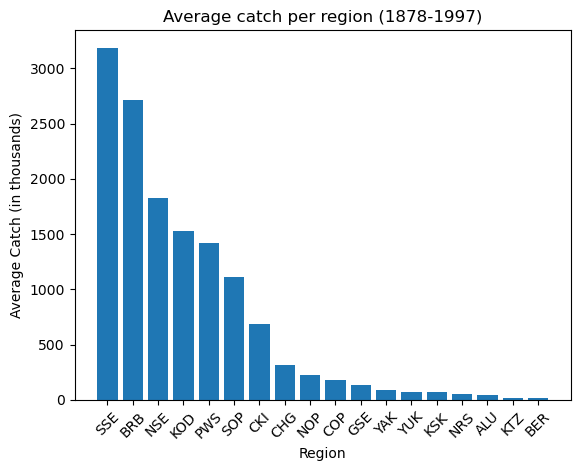

In [1]:
# FINAL CODE

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
catch_data = pd.read_csv("data/salmon_data.csv")

# Store the unique responses for the notes column in a new variable
notes_unique = catch_data['notesRegCode'].unique()

# Filter the catch_data where the catch column has value I
catch_I = catch_data[catch_data['Catch'] == 'I']

# Change the catch_data at row 400, column 'Catch' to equal 1 rather than I
catch_data.at[400, 'Catch'] = 1

# Reassign catch_1 to column 400 in catch_data. We know it is row 400 from the index in question 5.
catch_1 = catch_data.iloc[400]

# Use the astype(int) function to update the Catch column to be of type int. 
# Reassign catch column to be of type int
catch_data['Catch'] = catch_data['Catch'].astype(int)
catch_column_type = catch_data['Catch'].dtypes

# Use the groupby function to group by region and then get the mean catch for each region
catch_mean = catch_data.groupby('Region').Catch.mean()

# Use to_frame to convert our series to a dataframe
avg_region = catch_mean.to_frame().reset_index()

# Sort the values to be in descending order (i.e. the biggest values first)
avg_region = avg_region.sort_values(by='Catch',ascending=False)

# Plot the data
plt.bar(data = avg_region,
       x = 'Region',
       height = 'Catch')
plt.title('Average catch per region (1878-1997)')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Catch (in thousands)')

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [4]:
# a.
catch_data = pd.read_csv("data/salmon_data.csv")
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [5]:
# b.
# Use the dtypes method to look at the types of each column in the catch_data dataframe
catch_data.dtypes

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I chose to look at the data types of each column in the dataframe by using the dtypes method. This is helpful for knowing how to later engage with the columns. For instance, I now know that the Year column is an int rather than a datetime object.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Drop the notesRegCode column. We don't need to specify inplace=true because we are reassigning catch_data
catch_data = catch_data.drop('notesRegCode', axis=1)
catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


In [8]:
# Use dtypes method to check the 
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

It is expected that region and species would be of type object, generally meaning that they are strings. However, I would expect that catch would be type int because it is a number representing the commercial catches of salmon in thousands. Region could also be an int as it is a code, but it also works well as a string.

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [9]:
# Code does not work because there is value "I" trying to be converted to int.
# catch_data['Catch'].astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [10]:
# Filter the catch_data where the catch column has value I
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [11]:
catch_data.at[400, 'Catch'] = 1

# Reassign catch_1 to column 400 in catch_data. We know it is row 400 from the index in question 5.
catch_1 = catch_data.iloc[400]

In [12]:
type(catch_data)

pandas.core.frame.DataFrame

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [13]:
# Use the astype(int) function to update the Catch column to be of type int. 
# Reassign catch column to be of type int
catch_data['Catch'] = catch_data['Catch'].astype(int)
catch_column_type = catch_data['Catch'].dtypes

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [14]:
# Use the groupby function to group by region and then get the mean catch for each region
catch_mean = catch_data.groupby('Region').Catch.mean()

# Use to_frame to convert our series to a dataframe
avg_region = catch_mean.to_frame().reset_index()
avg_region

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

Text(0, 0.5, 'Average Catch (in thousands)')

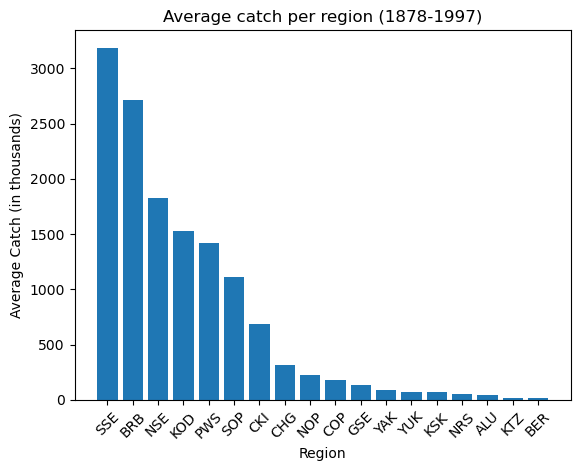

In [15]:
# Sort the values to be in descending order (i.e. the biggest values first)
avg_region = avg_region.sort_values(by='Catch',ascending=False)

# Plot the data
plt.bar(data = avg_region,
       x = 'Region',
       height = 'Catch')
plt.title('Average catch per region (1878-1997)')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Catch (in thousands)')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

Southern Southeast Alaska (SSE) has the highest average catch, coming in at over 3000. Bristol Bay Management Area (BRB) is the second highest, coming in around 2700. Bering River Sub-area (BER) has the lowest average catch. The highest seven areas are much higher than the lower average regions.